In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/dev_data/mydata.csv')

In [6]:
data.isnull().sum()

Patient_Number          0
Date Announced          0
Age Bracket             0
Gender                  0
Detected District       0
Detected State          0
Current Status          0
Type of transmission    0
dtype: int64

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

In [8]:
data['Gender'].replace(to_replace = "M ", value ="M", inplace=True)

In [9]:
data['Gender'].replace(to_replace = "M,", value ="M", inplace=True)

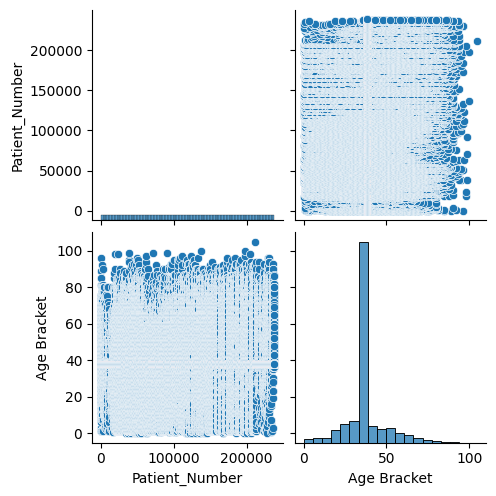

In [10]:
sns.pairplot(data)

<ipython-input-19-647a43ec8ff4>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)


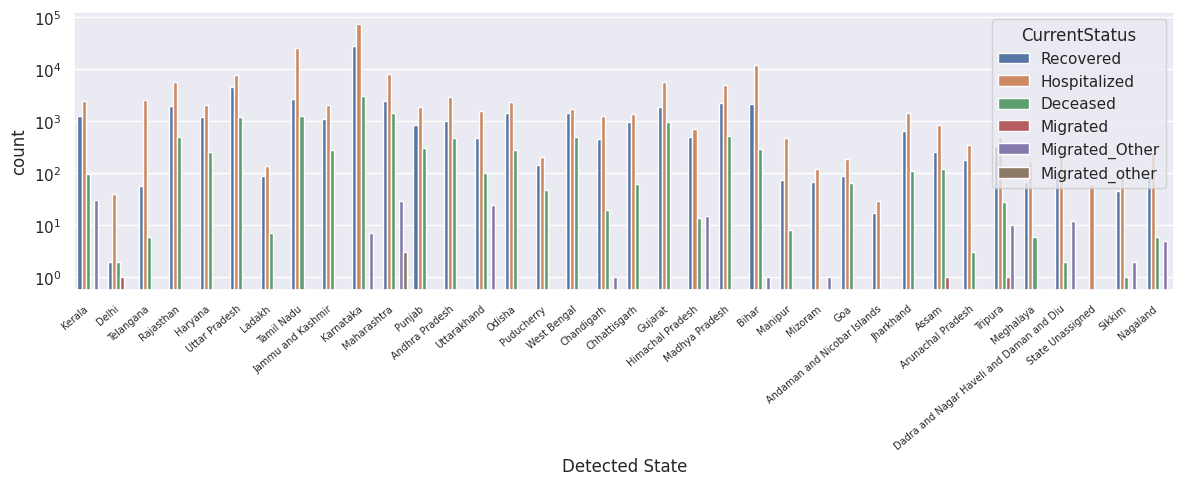

In [19]:
fig, ax = plt.subplots(1, figsize = (12,5))
ax = sns.countplot(x="Detected State", hue="CurrentStatus",data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
ax.set_yscale("log")
plt.tight_layout()
plt.show()

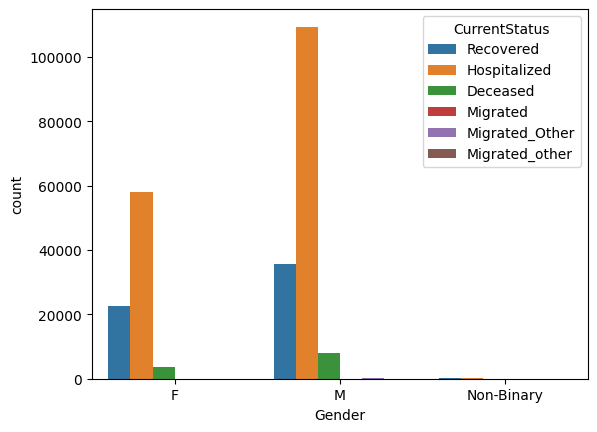

In [18]:

sns.countplot(x="Gender", hue="CurrentStatus", data=data)
sns.set(rc={'figure.figsize':(10,5)})


In [12]:
data.rename(columns = {'Current Status':'CurrentStatus'}, inplace = True)

In [13]:
data.rename(columns = {'Age Bracket':'Age'}, inplace = True)

In [14]:
data.rename(columns = {'Detected District':'DetectedDistrict'}, inplace = True)

Text(0, 0.5, 'Age')

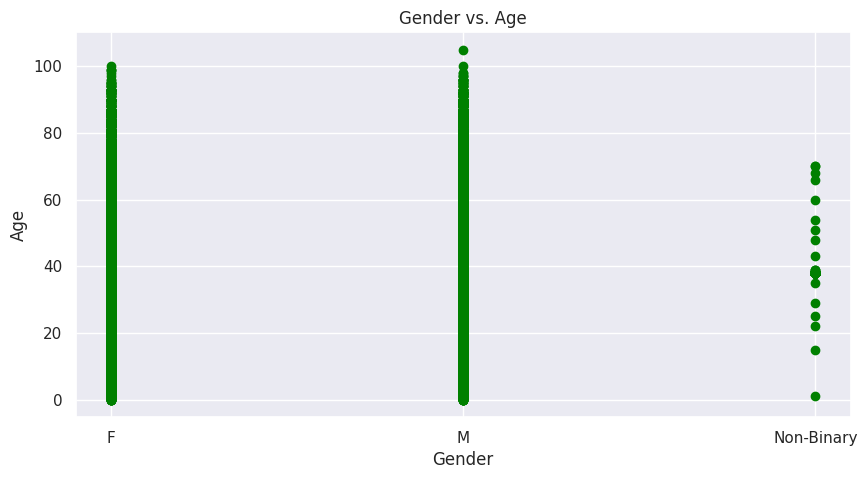

In [29]:
plt.scatter(data.Gender, data.Age, c="green")
plt.title('Gender vs. Age')
plt.xlabel('Gender')
plt.ylabel('Age')

In [21]:
data.hvplot.bivariate('Gender', 'Age')

AttributeError: 'DataFrame' object has no attribute 'hvplot'

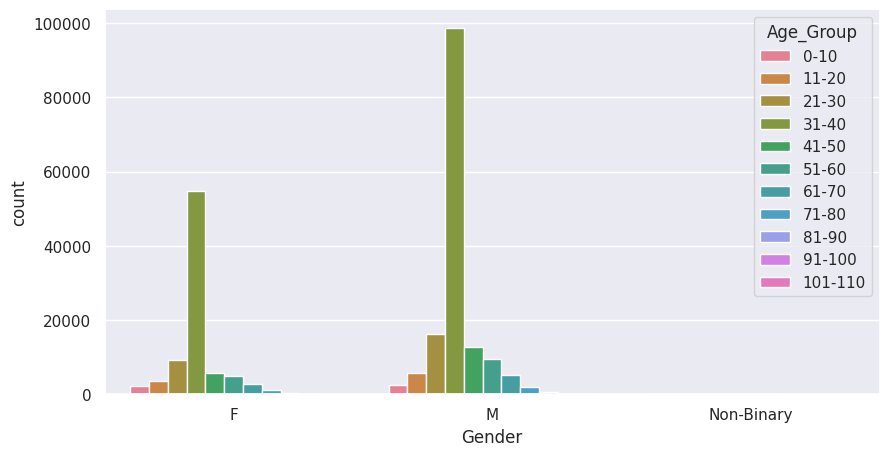

In [31]:
sns.countplot(x="Gender", hue="Age_Group", data=data)
sns.set(rc={'figure.figsize':(10,5)})

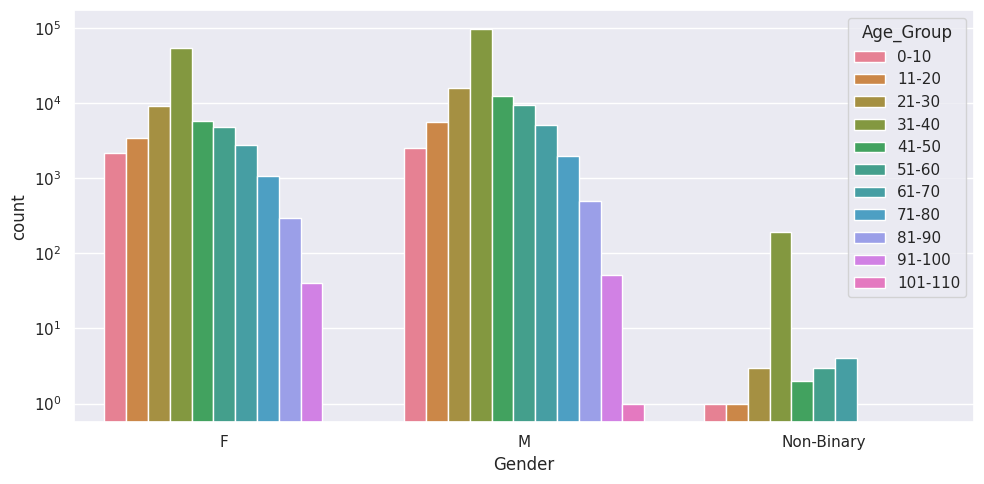

In [33]:
ax = sns.countplot(x="Gender", hue="Age_Group",data=data)

ax.set_yscale("log")
plt.tight_layout()
plt.show()

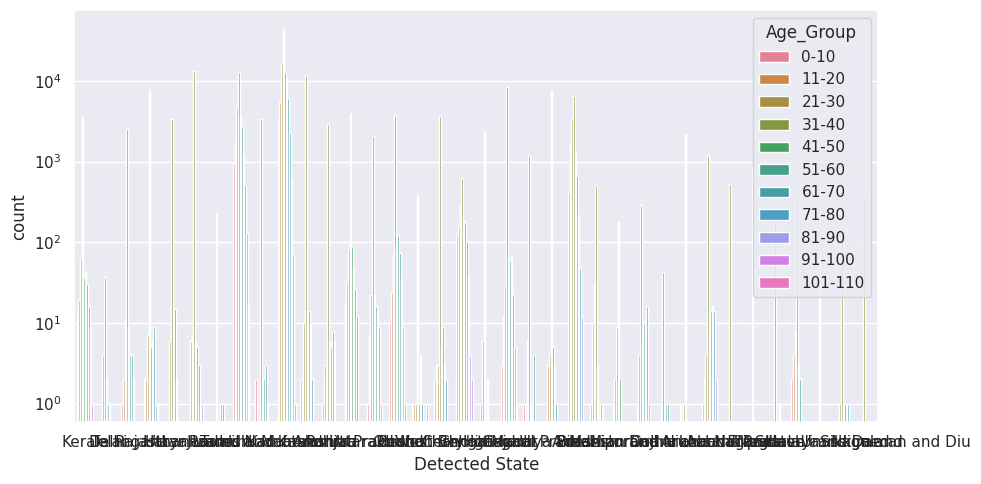

In [46]:
ax = sns.countplot(x="Detected State", hue="Age_Group",data=data)

ax.set_yscale("log")
plt.tight_layout()
plt.show()

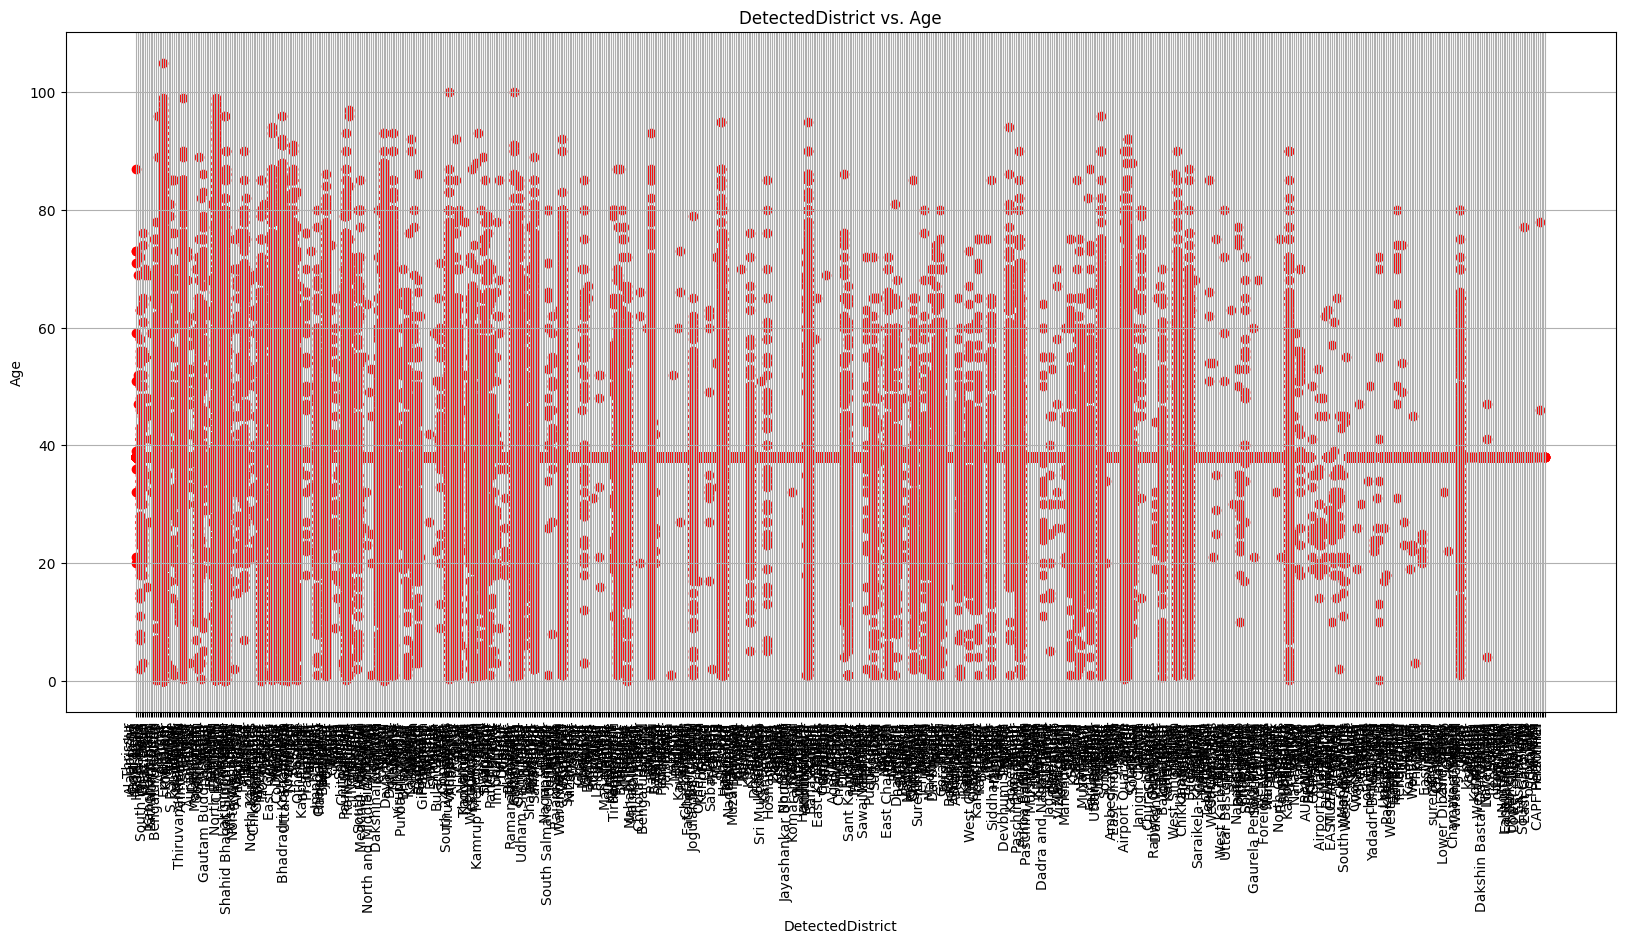

In [17]:
fig, ax = plt.subplots(1, figsize = (20, 10))
ax.grid()
fig.autofmt_xdate()
plt.scatter(data['DetectedDistrict'], data['Age'], c="red")
plt.xticks(rotation=90)
plt.title('DetectedDistrict vs. Age')
plt.xlabel('DetectedDistrict')
plt.ylabel('Age')
plt.show()

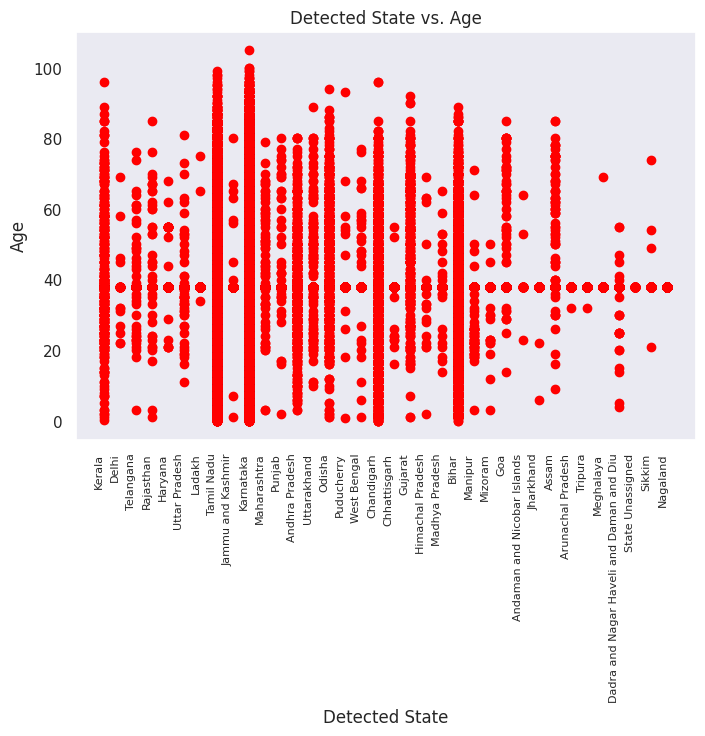

In [45]:
fig, ax = plt.subplots(1, figsize = (8, 6))
ax.grid()
fig.autofmt_xdate()
plt.scatter(data['Detected State'], data['Age'],c="red")
plt.xticks(rotation=90,fontsize=8)
plt.title('Detected State vs. Age')
plt.xlabel('Detected State')
plt.ylabel('Age')
plt.show()

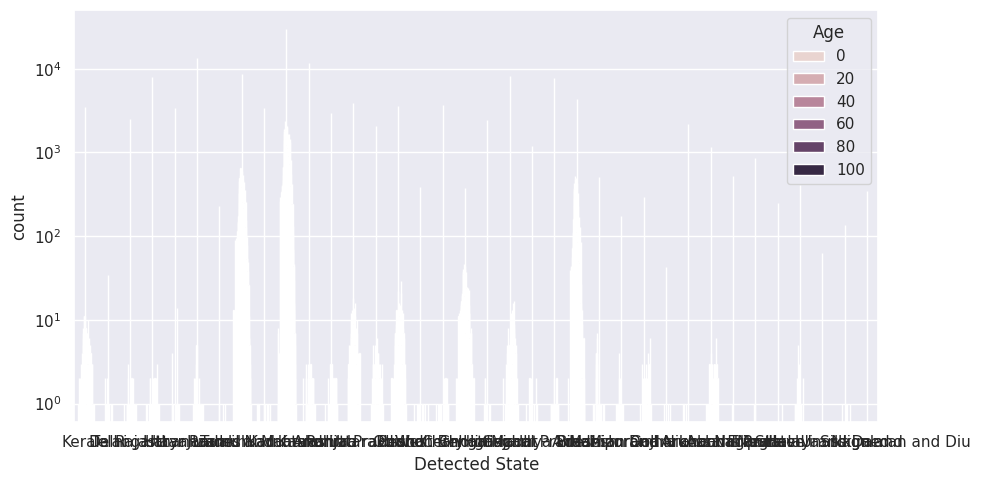

In [42]:
z

<ipython-input-65-4448ae099aa0>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=8)


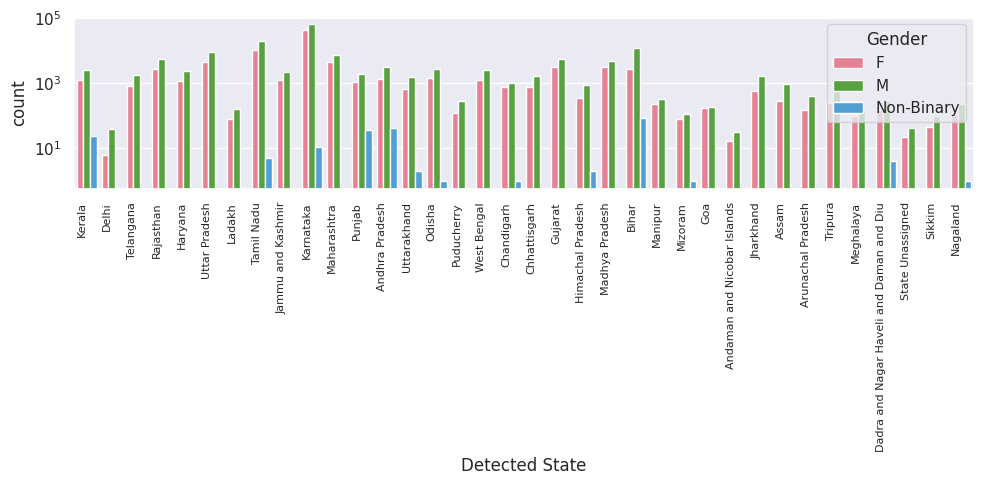

In [ ]:
ax = sns.countplot(x="Detected State", hue="Gender",palette="husl",data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=8)
ax.set_yscale("log")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

<ipython-input-22-61421e3d6438>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Detected State', order=state_order, palette="Blues_d")


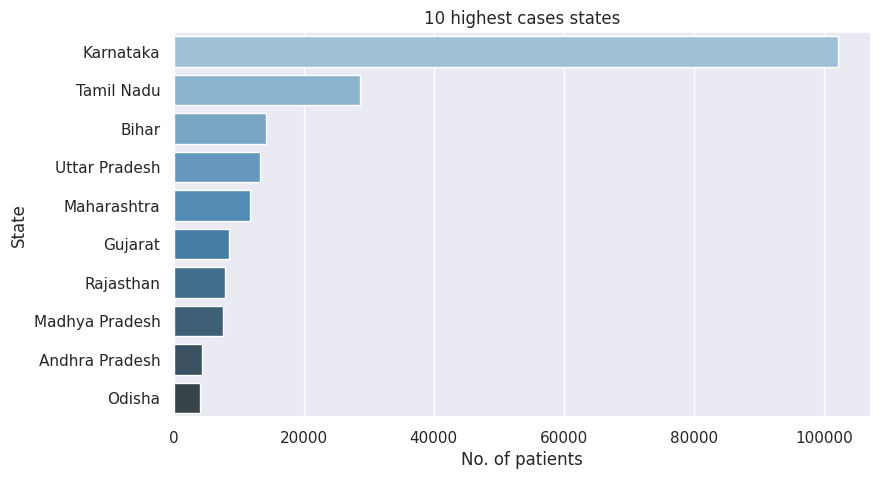

In [22]:
state_order = data['Detected State'].value_counts().head(10).index
plt.figure(figsize=(9, 5))
sns.countplot(data=data, y='Detected State', order=state_order, palette="Blues_d")
sns.set_color_codes("muted")
plt.title('10 highest cases states')
plt.xlabel('No. of patients')
plt.ylabel('State');


<ipython-input-45-d66fa5d83c7e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='DetectedDistrict', order=dist_order, palette="Greens_d")


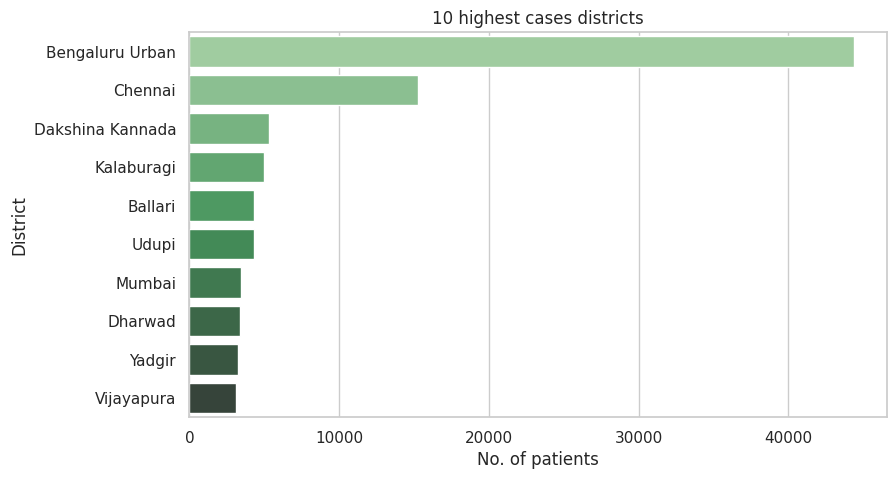

In [ ]:
dist_order = data['DetectedDistrict'].value_counts().head(10).index
plt.figure(figsize=(9, 5))
sns.countplot(data=data, y='DetectedDistrict', order=dist_order, palette="Greens_d")
sns.set_color_codes("muted")
plt.title('10 highest cases districts')
plt.xlabel('No. of patients')
plt.ylabel('District');


In [24]:
counts = data.groupby(['Age','Gender']).count()
print (counts)

               Patient_Number  Date Announced  DetectedDistrict  \
Age    Gender                                                     
0.00   F                    6               6                 6   
       M                    6               6                 6   
0.01   M                    1               1                 1   
0.05   F                    1               1                 1   
0.10   F                   13              13                13   
...                       ...             ...               ...   
98.00  M                    2               2                 2   
99.00  F                    3               3                 3   
100.00 F                    1               1                 1   
       M                    1               1                 1   
105.00 M                    1               1                 1   

               Detected State  CurrentStatus  Type of transmission  
Age    Gender                                              

In [27]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90,100, 110]  # You can adjust these bin edges
bin_labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110']  # You can adjust these labels

# Perform binning on 'Age'
data['Age_Group'] = pd.cut(data['Age'], bins=bin_edges, labels=bin_labels)